## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/ismahanadan/Desktop/matplotlib-challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/ismahanadan/Desktop/matplotlib-challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata_df, study_results_df, how="outer", on=["Mouse ID"])


# Display the data table for preview

combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
num_mice =  combined_data_df["Mouse ID"].count()
num_mice

1893

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
duplicate = combined_data_df[combined_data_df.duplicated('Mouse ID', 'Timepoint')]
duplicate

ValueError: keep must be either "first", "last" or False

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID'])
clean_data_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice =  clean_data_df["Mouse ID"].count()
num_mice

249

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Create summary df
summary_df = combined_data_df.groupby('Drug Regimen').count()

summary_df.head()





,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [8]:
#mean of the tumor volume.

mean_tumor_vol = summary_df['Tumor Volume (mm3)'].mean()
mean_tumor_vol



189.3

In [9]:
#median of the tumor volume.

median_tumor_vol = summary_df['Tumor Volume (mm3)'].median() 
median_tumor_vol

181.5

In [10]:
#variance of the tumor volume.

var_tumor_vol = summary_df["Tumor Volume (mm3)"].var()
var_tumor_vol

490.4555555555556

In [11]:
#standard deviation of the tumor volume.

std_tumor_vol = summary_df["Tumor Volume (mm3)"].std() 
std_tumor_vol

22.146231181750892

In [12]:
#SEM of the tumor volume.

sem_tumor_vol = summary_df["Tumor Volume (mm3)"].sem() 
sem_tumor_vol

7.003253212297521

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime

tumor_summary_df = pd.DataFrame({"Mean": mean_tumor_vol,
                                "Median": median_tumor_vol,
                                "Variance": var_tumor_vol,
                                "standard Deviation": std_tumor_vol,
                                "SEM": sem_tumor_vol})

tumor_summary_df.head()

ValueError: If using all scalar values, you must pass an index

In [14]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

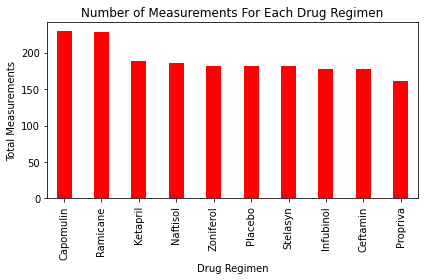

In [49]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Plot a bar chart on the amount of data points using value_count
# Groupby Drug Regimen
drugs_chart = combined_data_df['Drug Regimen'].value_counts().plot.bar(width=0.4, color='red')

# Set the xlabel and ylabel using class methods
drugs_chart.set_xlabel("Drug Regimen")
drugs_chart.set_ylabel("Total Measurements")
plt.title('Number of Measurements For Each Drug Regimen')
plt.tight_layout()


plt.show()






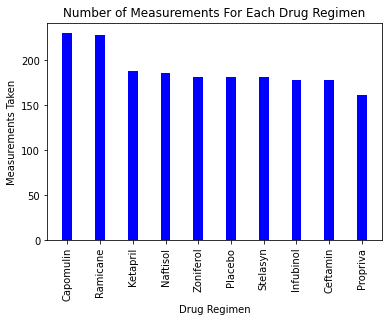

In [47]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Calculate the number of measurement taken for each drug regimen
counts =  combined_data_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.3, color='blue')

# # Label the tick marks according to the index values in the 'counts' series
# Rotate tick marks 90 degrees for better visibility
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")
plt.title('Number of Measurements For Each Drug Regimen')


# Display plot
plt.show()


Text(0, 0.5, '')

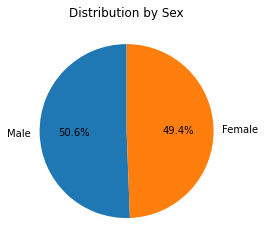

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Identify distribution of data by sex
sex_data = combined_data_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = sex_data.plot.pie(startangle=90, autopct="%1.1f%%", title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')



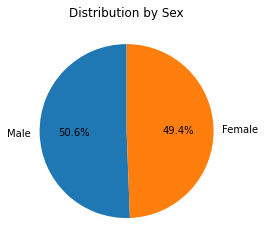

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
sex_data = combined_data_df['Sex'].value_counts()

# create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(combined_data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_timepoint = pd.merge(combined_data_df,max_timepoint, on='Mouse ID')
merged_timepoint.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
